starting best score, %  target:  65.33333333333333
End best score, % target:  100.0


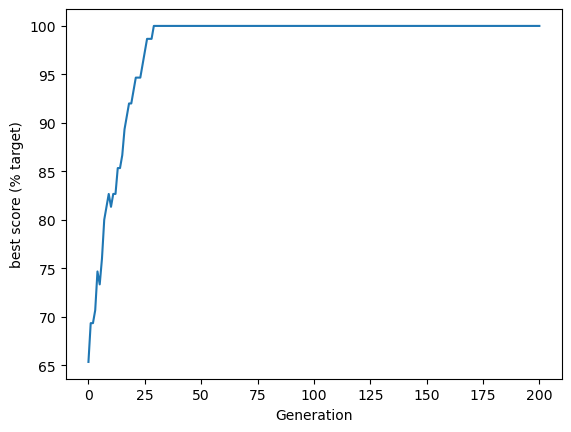

In [2]:
import numpy as np

def create_references_solution(chromosome_length):
    number_of_ones = int(chromosome_length/2)
    #Build an array with an equal mix of zero and ones
    references = np.zeros(chromosome_length)
    references[0:number_of_ones] = 1
    #shuffle array to mix of 1 and 0
    np.random.shuffle(references)
    return references

def creating_starting_population(individuals,chromosome_length):
    #set up an initial array of all zeros
    population = np.zeros((individuals,chromosome_length))
    #loop through each row(individuals)
    for I in range(individuals):
        #choose a random number of ones to create
        ones = np.random.randint(0,chromosome_length)
        #change the rquired number of zeros to nes 
        population[I, 0:ones] = 1
        #shuffle row
        np.random.shuffle(population[I])
    return population

def calculate_fitness(references,population):
    #create an array of True/False compared to reference
    identical_to_reference = population==references
    #sum numver of genes that are identical to the reference
    fitness_score = identical_to_reference.sum(axis=1)
    return fitness_score

def select_individual_by_tournament(population,scores):
    #get population size
    population_size = len(scores)
    #pick 2 individual for tournament
    fighter_1 = np.random.randint(0,population_size-1)
    fighter_2 = np.random.randint(0,population_size-1)
    #get fitness score for each
    fighter_1_fitness = scores[fighter_1]
    fighter_2_fitness = scores[fighter_2]
    #identify unindividual with highest fitness
    #figher 1 will win if score are equal
    if fighter_1_fitness >= fighter_2_fitness:
        winner = fighter_1
    else:
        winner = fighter_2
    
    #return the chromosome of the winner
    return population[winner,:]

def breed_by_crossover(parent_1,parent_2):
    #get length of chromosome
    chromosome_length = len(parent_1)
    #pick crossover point ,avoding ends of chromosome
    crossover_point = np.random.randint(1,chromosome_length-1)
    #create children np.hstack joins two arrays
    child_1 = np.hstack((parent_1[0:crossover_point],
                         parent_2[crossover_point:]))
    child_2 = np.hstack((parent_2[0:crossover_point],
                         parent_1[crossover_point:]))
    return child_1,child_2

def randomly_mutate_population(population,mutation_probability):
    #apply random mutation
    random_mutation_array = np.random.random(size=(population.shape))
    random_mutation_boolean = random_mutation_array <= mutation_probability
    population[random_mutation_boolean] = np.logical_not(population[random_mutation_boolean])
    return population

# *********** MAIN AMLGORITHM CODE ************
#set general parameters
chromosome_length = 75
population_size = 500
maximum_generation = 200
best_score_progress = [] #tracks progress

#create reference solution
#this is use to illustrate GAs
references = create_references_solution(chromosome_length)

#create starting population
population = creating_starting_population(population_size,chromosome_length)

#display best scor in starting population
scores = calculate_fitness(references,population)
best_score = np.max(scores)/chromosome_length * 100
print("starting best score, %  target: ",best_score)

#add starting best score to progress tracker
best_score_progress.append(best_score)

#now we wil go through the generation of genetic algorithm
for generation in range (maximum_generation):
    #create an empty list for new population
    new_population = []
    
    #create new population generating two children at a time
    for i in range (int(population_size/2)):
        parent_1 = select_individual_by_tournament(population,scores)
        parent_2 = select_individual_by_tournament(population,scores)
        child_1,child_2 = breed_by_crossover(parent_1,parent_2)
        new_population.append(child_1)
        new_population.append(child_2)
        
    #replace the old population with the new one
    population = np.array(new_population)
        
    #apply mutation
    mutation_rate = .002
    population = randomly_mutate_population(population,mutation_rate)
        
    #score best solution, and add to tracker
    scores = calculate_fitness(references,population)
    best_score = np.max(scores)/chromosome_length * 100
    best_score_progress.append(best_score)
    
#GA has completed required generation
print("End best score, % target: ",best_score)

#plot progress
import matplotlib.pyplot as plt
plt.plot(best_score_progress)
plt.xlabel('Generation')
plt.ylabel('best score (% target)')
plt.show()

In [4]:
import random
import numpy as np
class Particle(object):
    def __init__(self):
        #Generate a random array containing two float number in range (-50,50)
        self.position = np.array([(-1)**(bool(random.getrandbits(1)))*random.random()*50 ,
                                  (-1)**(bool(random.getrandbits(1)))*random.random()*50])
        self.pbest_position = self.position
        self.pbest_value = float('inf')
        self.velocity = np.array([0,0])
        
    def __str__(self):
        print("i am at",self.position," meu pbest is",self.pbest_position)
        
    def move(self):
        self.position = self.position + self.velocity
        

class Space(object):
    def __init__(self,target,target_error,n_particles):
        self.target = target
        self.target_error = target_error
        self.n_particles = n_particles
        self.particles = []
        self.gbest_value = float('inf')
        self.gbest_position = np.array([random.random()*50,random.random()*50])
        
    def print_particle(self):
        for particle in self.particles:
            particle.__str__()
            
    def fitness(self,particle):
        return particle.position[0]**2 + particle.position[1]**2 + 1
    
    def set_pbest(self):
        for particle in self.particles:
            fitness_candidate = self.fitness(particle)
            if(particle.pbest_value > fitness_candidate):
                particle.pbest_value = fitness_candidate
                particle.pbest_position = particle.position
                
    def set_gbest(self):
        for particle in self.particles:
            best_fitness_candidate = self.fitness(particle)
            if(self.gbest_value > best_fitness_candidate):
                self.gbest_value = best_fitness_candidate
                self.gbest_position = particle.position
                
    def move_particle(self):
        for particle in self.particles:
            global W
            new_velocity = (W*particle.velocity) + (c1*random.random()) * (particle.pbest_position - particle.position) + (random.random()*c2) * (self.gbest_position - particle.position)
            particle.velocity = new_velocity
            particle.move()
            

W = .5
c1 = .8
c2 = .9

n_iterations = int(input("Inform the number of iterations: "))
target_error = float(input("Inform the rtarget error: "))
n_particles  = int(input("Inform the number of particles: "))

search_space = Space(1,target_error,n_particles)
particles_vector = [Particle() for _ in range (search_space.n_particles)]
search_space.particles = particles_vector
search_space.print_particle()

iteration = 0
while(iteration < n_iterations):
    search_space.set_pbest()
    search_space.set_gbest()
    if(abs(search_space.gbest_value - search_space.target) <= search_space.target_error):
        break
    search_space.move_particle()
    iteration+=1
    
print("the best solution is: ",search_space.gbest_position,"in iterations:",iteration)

Inform the number of iterations: 1
Inform the rtarget error: 0
Inform the number of particles: 0
the best solution is:  [ 2.16886639 43.06314941] in iterations: 1


In [5]:
import numpy as np

class NeuralNetwork(object):
    def __init__(self):
        #seeding for random number generation
        np.random.seed(1)
        #converting weights to a 3 by 1 matrix with values from -1 to1 and mean of 0
        self.synaptic_weights = 2*np.random.random((3,1)) - 1
        
    def sigmoid(self,x):
        #applying the sigmoid function
        return 1/(1+ np.exp(-x))
    
    def sigmoid_derivative(self,x):
        #computing derivative to the sigmoid function
        return x*(1-x)
    
    def think(self,inputs):
        #passing the inputs via the neuron to get output
        #convering values to floats
        inputs = inputs.astype(float)
        output = self.sigmoid(np.dot(inputs,self.synaptic_weights))
        return output
    
    def train(self,training_inputs,training_outputs,training_iterations):
        #training the model to make accurate predictions while adjusting weights continually
        for iteration in range(training_iterations):
            #siphon the training data via the neuron
            output = self.think(training_inputs)
            #computing error rate for vack-propagation
            error = training_outputs - output
            #performing weight adjustments
            adjustments = np.dot(training_inputs.T,error*self.sigmoid_derivative(output))
            self.synaptic_weights += adjustments
            
if __name__ == "__main__":
    #initializing the neuron class
    neural_network = NeuralNetwork()
    print("beggining randomly generated weights")
    print(neural_network.synaptic_weights)
    #training data consissting of 4 examples--3 inpur values and 1 output
    training_inputs = np.array([[0,0,1],
                                 [1,1,1],
                                 [1,0,1],
                                 [0,1,1]])
    training_outputs = np.array([[0,1,1,0]]).T
    #training taking place
    neural_network.train(training_inputs,training_outputs,15000)
    print("ending weights after training: ")
    print(neural_network.synaptic_weights)
    
    user_input_one = str(input("user input one: "))
    user_input_two = str(input("user input two: "))
    user_input_three = str(input("user input three: "))
    
    print("considering new situation: ",user_input_one,user_input_two,user_input_three)
    print("new data output")
    print(neural_network.think(np.array([user_input_one,user_input_two,user_input_three])))
    print("the simulation completed successfully!")

beggining randomly generated weights
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
ending weights after training: 
[[10.08740896]
 [-0.20695366]
 [-4.83757835]]
user input one: 1
user input two: 0
user input three: 0
considering new situation:  1 0 0
new data output
[0.9999584]
the simulation completed successfully!


In [6]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

training_inputs = np.array([[0,0,1],
                            [1,1,1],
                            [1,0,1],
                            [0,1,1]])

training_outputs = np.array([[0,1,1,0]]).T

np.random.seed(1)

synaptic_weights = 2 * np.random.random((3,1)) - 1

print('Random starting synaptic weights: ')
print(synaptic_weights)

for iteration in range(10000):
    input_layer = training_inputs
    outputs = sigmoid(np.dot(input_layer, synaptic_weights))
    error = training_outputs - outputs
    adjustments = error * sigmoid_derivative(outputs)
    synaptic_weights += np.dot(input_layer.T, adjustments)

print('Synaptic weights after training: ')
print(synaptic_weights)

print("Output After Training:")
print(outputs)

Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Synaptic weights after training: 
[[ 9.67299303]
 [-0.2078435 ]
 [-4.62963669]]
Output After Training:
[[0.00966449]
 [0.99211957]
 [0.99358898]
 [0.00786506]]


In [4]:
import numpy as np

# sigmoid function to normalize inputs
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# sigmoid derivatives to adjust synaptic weights
def sigmoid_derivative(x):
    return x * (1 - x)

# input dataset
training_inputs = np.array([[0,0,1],
                            [1,1,1],
                            [1,0,1],
                            [0,1,1]])

# output dataset
training_outputs = np.array([[0,1,1,0]]).T

# seed random numbers to make calculation
np.random.seed(1)

# initialize weights randomly with mean 0 to create weight matrix, synaptic weights
synaptic_weights = 2 * np.random.random((3,1)) - 1

print('Random starting synaptic weights: ')
print(synaptic_weights)

# Iterate 10,000 times
for iteration in range(10000):

    # Define input layer
    input_layer = training_inputs
    # Normalize the product of the input layer with the synaptic weights
    outputs = sigmoid(np.dot(input_layer, synaptic_weights))

    # how much did we miss?
    error = training_outputs - outputs

    # multiply how much we missed by the
    # slope of the sigmoid at the values in outputs
    adjustments = error * sigmoid_derivative(outputs)

    # update weights
    synaptic_weights += np.dot(input_layer.T, adjustments)

print('Synaptic weights after training: ')
print(synaptic_weights)

print("Output After Training:")
print(outputs)

Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Synaptic weights after training: 
[[ 9.67299303]
 [-0.2078435 ]
 [-4.62963669]]
Output After Training:
[[0.00966449]
 [0.99211957]
 [0.99358898]
 [0.00786506]]


In [7]:
import numpy as np

class NeuralNetwork():
    
    def __init__(self):
        # Seed the random number generator
        np.random.seed(1)

        # Set synaptic weights to a 3x1 matrix,
        # with values from -1 to 1 and mean 0
        self.synaptic_weights = 2 * np.random.random((3, 1)) - 1

    def sigmoid(self, x):
        """
        Takes in weighted sum of the inputs and normalizes
        them through between 0 and 1 through a sigmoid function
        """
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        """
        The derivative of the sigmoid function used to
        calculate necessary weight adjustments
        """
        return x * (1 - x)

    def train(self, training_inputs, training_outputs, training_iterations):
        """
        We train the model through trial and error, adjusting the
        synaptic weights each time to get a better result
        """
        for iteration in range(training_iterations):
            # Pass training set through the neural network
            output = self.think(training_inputs)

            # Calculate the error rate
            error = training_outputs - output

            # Multiply error by input and gradient of the sigmoid function
            # Less confident weights are adjusted more through the nature of the function
            adjustments = np.dot(training_inputs.T, error * self.sigmoid_derivative(output))

            # Adjust synaptic weights
            self.synaptic_weights += adjustments

    def think(self, inputs):
        """
        Pass inputs through the neural network to get output
        """
        
        inputs = inputs.astype(float)
        output = self.sigmoid(np.dot(inputs, self.synaptic_weights))
        return output


if __name__ == "__main__":

    # Initialize the single neuron neural network
    neural_network = NeuralNetwork()

    print("Random starting synaptic weights: ")
    print(neural_network.synaptic_weights)

    # The training set, with 4 examples consisting of 3
    # input values and 1 output value
    training_inputs = np.array([[0,0,1],
                                [1,1,1],
                                [1,0,1],
                                [0,1,1]])

    training_outputs = np.array([[0,1,1,0]]).T

    # Train the neural network
    neural_network.train(training_inputs, training_outputs, 10000)

    print("Synaptic weights after training: ")
    print(neural_network.synaptic_weights)

    A = str(input("Input 1: "))
    B = str(input("Input 2: "))
    C = str(input("Input 3: "))
    
    print("New situation: input data = ", A, B, C)
    print("Output data: ")
    print(neural_network.think(np.array([A, B, C])))

Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Synaptic weights after training: 
[[ 9.67299303]
 [-0.2078435 ]
 [-4.62963669]]
Input 1: 1
Input 2: 0
Input 3: 0
New situation: input data =  1 0 0
Output data: 
[0.99993704]


# Neural Network

In [1]:
import numpy as np

class NeuralNetwork(object):
    def __init__(self):
        #seeding for random number generation
        np.random.seed(1)
        #converting weights to a 3 by 1 matrix with values from -1 to1 and mean of 0
        self.synaptic_weights = 2*np.random.random((3,1)) - 1
        
    def sigmoid(self,x):
        #applying the sigmoid function
        return 1/(1+ np.exp(-x))
    
    def sigmoid_derivative(self,x):
        #computing derivative to the sigmoid function
        return x*(1-x)
    
    def think(self,inputs):
        #passing the inputs via the neuron to get output
        #convering values to floats
        inputs = inputs.astype(float)
        output = self.sigmoid(np.dot(inputs,self.synaptic_weights))
        return output
    
    def train(self,training_inputs,training_outputs,training_iterations):
        #training the model to make accurate predictions while adjusting weights continually
        for iteration in range(training_iterations):
            #siphon the training data via the neuron
            output = self.think(training_inputs)
            #computing error rate for vack-propagation
            error = training_outputs - output
            #performing weight adjustments
            adjustments = np.dot(training_inputs.T,error*self.sigmoid_derivative(output))
            self.synaptic_weights += adjustments
            
if __name__ == "__main__":
    #initializing the neuron class
    neural_network = NeuralNetwork()
    print("beggining randomly generated weights")
    print(neural_network.synaptic_weights)
    #training data consissting of 4 examples--3 inpur values and 1 output
    training_inputs = np.array([[0,0,1],
                                 [1,1,1],
                                 [1,0,1],
                                 [0,1,1]])
    training_outputs = np.array([[0,1,1,0]]).T
    #training taking place
    neural_network.train(training_inputs,training_outputs,15000)
    print("ending weights after training: ")
    print(neural_network.synaptic_weights)
    
    user_input_one = str(input("user input one: "))
    user_input_two = str(input("user input two: "))
    user_input_three = str(input("user input three: "))
    
    print("considering new situation: ",user_input_one,user_input_two,user_input_three)
    print("new data output")
    print(neural_network.think(np.array([user_input_one,user_input_two,user_input_three])))
    print("the simulation completed successfully!")

beggining randomly generated weights
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
ending weights after training: 
[[10.08740896]
 [-0.20695366]
 [-4.83757835]]
user input one: 1
user input two: 0
user input three: 0
considering new situation:  1 0 0
new data output
[0.9999584]
the simulation completed successfully!


## Read new CSV

In [2]:
import numpy as np
import pandas as pd

df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [4]:
X=df.drop(["Outcome"],axis=1)
y=df["Outcome"]

In [5]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [6]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## normalize

In [7]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X=scaler.fit_transform(X)

In [8]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

## Train/Test

In [9]:
from sklearn.model_selection import train_test_split

X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [11]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score,recall_score,precision_score

acc_train=accuracy_score(y_train,y_pred_train)
acc_test=accuracy_score(y_test,y_pred_test)

acc_train,acc_test

(0.7833876221498371, 0.7727272727272727)

In [13]:
p=precision_score(y_test,y_pred_test)

r=recall_score(y_test,y_pred_test)

p,r

(0.7, 0.5490196078431373)

# ANN

In [14]:
from sklearn.neural_network import MLPClassifier

model=MLPClassifier(hidden_layer_sizes=128,max_iter=200)
model.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=128)

In [15]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

acc_train=accuracy_score(y_train,y_pred_train)
acc_test=accuracy_score(y_test,y_pred_test)

acc_train,acc_test

(0.8192182410423453, 0.7337662337662337)

In [17]:
p=precision_score(y_test,y_pred_test)

r=recall_score(y_test,y_pred_test)

p,r

(0.5925925925925926, 0.6274509803921569)